## Объекты вокруг земли



Проблемная область: космические объекты и их угроза для Земли

Объект наблюдения: астероиды и другие малые тела Солнечной системы

Атрибуты: имя объекта, минимальный и максимальный оценочные диаметры, относительная скорость, расстояние промаха, орбитальное тело, объекты программы "Сентри", абсолютная звездная величина, опасность

Пример бизнес-цели: 

    1. Разработка и продажа страховых продуктов для космических рисков. Цель технического проекта: разработка системы оценки рисков и ценообразования для страховых продуктов, защищающих от космических угроз.

    2. Разработка и продажа технологий для мониторинга и предотвращения космических угроз. Цель технического проекта: создание системы мониторинга и прогнозирования траекторий небесных тел для предотвращения космических угроз.

    3. Образовательные программы и сервисы. Цель технического проекта: разработка интерактивных образовательных материалов и сервисов, основанных на данных о небесных телах.

Актуальность: Исследования астероидов и разработка технологий для их отклонения не только помогают защитить Землю от потенциальных угроз, но и стимулируют научные открытия в различных областях, включая астрономию, физику, инженерию и образование. Эта тема имеет важное значение для будущего нашей планеты и человечества в целом.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# вывод всех столбцов
df = pd.read_csv("..//static//csv//neo.csv")
print(df.columns)

Index(['id', 'name', 'est_diameter_min', 'est_diameter_max',
       'relative_velocity', 'miss_distance', 'orbiting_body', 'sentry_object',
       'absolute_magnitude', 'hazardous'],
      dtype='object')


Проверяем на выбросы

Количество выбросов в столбце 'relative_velocity': 1574
Количество выбросов в столбце 'miss_distance': 0
Количество выбросов в столбце 'absolute_magnitude': 101


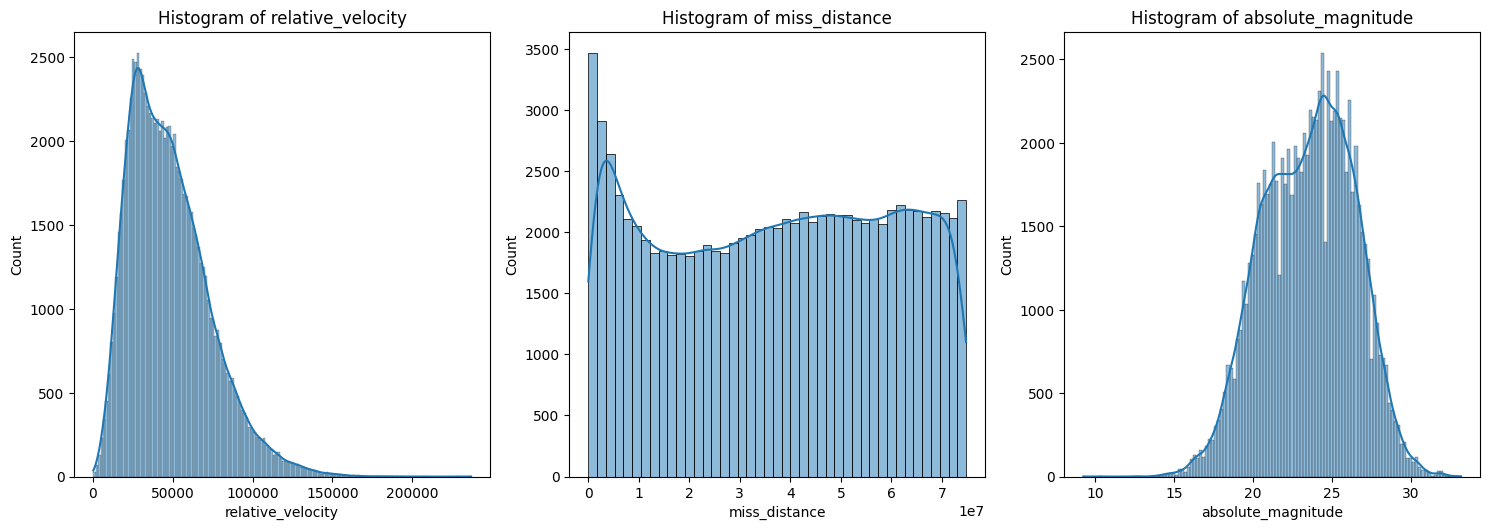

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Выбираем столбцы для анализа
columns_to_check = ['relative_velocity', 'miss_distance', 'absolute_magnitude']

# Функция для подсчета выбросов
def count_outliers(df, columns):
    outliers_count = {}
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Считаем количество выбросов
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        outliers_count[col] = len(outliers)
    
    return outliers_count

# Подсчитываем выбросы
outliers_count = count_outliers(df, columns_to_check)

# Выводим количество выбросов для каждого столбца
for col, count in outliers_count.items():
    print(f"Количество выбросов в столбце '{col}': {count}")
    
# Создаем гистограммы
plt.figure(figsize=(15, 10))
for i, col in enumerate(columns_to_check, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[col], kde=True)
    plt.title(f'Histogram of {col}')
plt.tight_layout()
plt.show()

В столбцах 'relative_velocity'и 'absolute_magnitude' присутствуют выбросы. Теперь можно очистить их от выбросов

Количество выбросов в столбце 'relative_velocity': 248
Количество выбросов в столбце 'absolute_magnitude': 0
Количество удаленных строк: 265


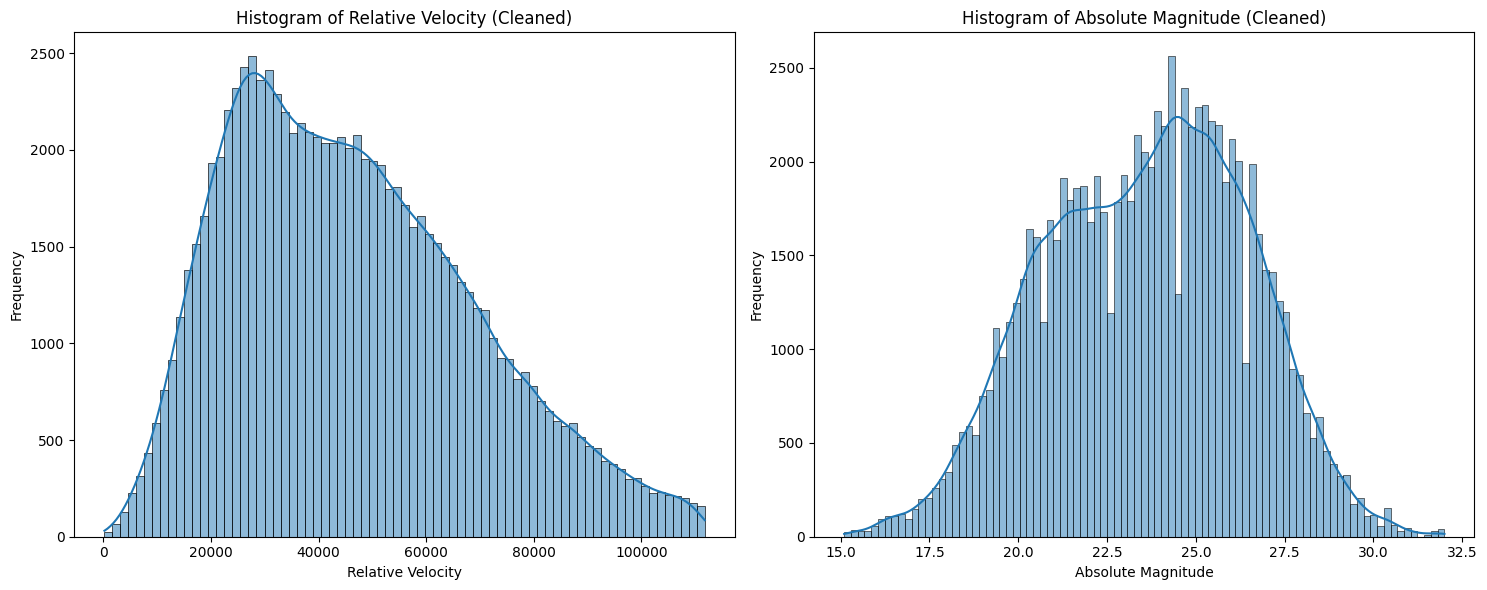

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Выбираем столбцы для анализа
columns_to_check = ['relative_velocity', 'absolute_magnitude']

# Функция для подсчета выбросов
def count_outliers(df, columns):
    outliers_count = {}
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Считаем количество выбросов
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        outliers_count[col] = len(outliers)
    
    return outliers_count

# Подсчитываем выбросы
outliers_count = count_outliers(df, columns_to_check)

# Выводим количество выбросов для каждого столбца
for col, count in outliers_count.items():
    print(f"Количество выбросов в столбце '{col}': {count}")
    
# Выбираем столбцы для очистки
columns_to_clean = ['relative_velocity', 'absolute_magnitude']

# Функция для удаления выбросов
def remove_outliers(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Удаляем строки, содержащие выбросы
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    
    return df

# Удаляем выбросы
df_cleaned = remove_outliers(df, columns_to_clean)

# Выводим количество удаленных строк
print(f"Количество удаленных строк: {len(df) - len(df_cleaned)}")

# Создаем гистограммы для очищенных данных
plt.figure(figsize=(15, 6))

# Гистограмма для relative_velocity
plt.subplot(1, 2, 1)
sns.histplot(df_cleaned['relative_velocity'], kde=True)
plt.title('Histogram of Relative Velocity (Cleaned)')
plt.xlabel('Relative Velocity')
plt.ylabel('Frequency')

# Гистограмма для absolute_magnitude
plt.subplot(1, 2, 2)
sns.histplot(df_cleaned['absolute_magnitude'], kde=True)
plt.title('Histogram of Absolute Magnitude (Cleaned)')
plt.xlabel('Absolute Magnitude')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Сохраняем очищенный датасет
df_cleaned.to_csv("..//static//csv//neo.csv", index=False)

Можно заметить, что выбросов стало меньше

In [19]:
import pandas as pd

# Проверка на пропущенные значения
missing_values = df.isnull().sum()

# Вывод результатов
print("Количество пропущенных значений в каждом столбце:")
print(missing_values)

Количество пропущенных значений в каждом столбце:
id                    0
name                  0
est_diameter_min      0
est_diameter_max      0
relative_velocity     0
miss_distance         0
orbiting_body         0
sentry_object         0
absolute_magnitude    0
hazardous             0
dtype: int64


Пропущенных значений в датасете нет. Можно перейти к созданию выборок

In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Разделение на признаки (X) и целевую переменную (y)
# Предположим, что 'hazardous' - это целевая переменная
X = df.drop('hazardous', axis=1)
y = df['hazardous']

# Разбиение на обучающую и остальную выборку (контрольную + тестовую)
X_train, X_rem, y_train, y_rem = train_test_split(X, y, train_size=0.6, random_state=42)

# Разбиение остатка на контрольную и тестовую выборки
X_val, X_test, y_val, y_test = train_test_split(X_rem, y_rem, test_size=0.5, random_state=42)

# Вывод размеров выборок
print("Размер обучающей выборки:", X_train.shape)
print("Размер контрольной выборки:", X_val.shape)
print("Размер тестовой выборки:", X_test.shape)

Размер обучающей выборки: (53494, 9)
Размер контрольной выборки: (17832, 9)
Размер тестовой выборки: (17832, 9)


In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Разделение на признаки (X) и целевую переменную (y)
X = df.drop('hazardous', axis=1)
y = df['hazardous']

# Разбиение на обучающую и остальную выборку (контрольную + тестовую)
X_train, X_rem, y_train, y_rem = train_test_split(X, y, train_size=0.6, random_state=42, stratify=y)

# Разбиение остатка на контрольную и тестовую выборки
X_val, X_test, y_val, y_test = train_test_split(X_rem, y_rem, test_size=0.5, random_state=42, stratify=y_rem)

# Функция для анализа сбалансированности
def analyze_balance(y_train, y_val, y_test):
    print("Распределение классов в обучающей выборке:")
    print(y_train.value_counts(normalize=True))
    
    print("\nРаспределение классов в контрольной выборке:")
    print(y_val.value_counts(normalize=True))
    
    print("\nРаспределение классов в тестовой выборке:")
    print(y_test.value_counts(normalize=True))

# Анализ сбалансированности
analyze_balance(y_train, y_val, y_test)

Распределение классов в обучающей выборке:
hazardous
False    0.905989
True     0.094011
Name: proportion, dtype: float64

Распределение классов в контрольной выборке:
hazardous
False    0.905956
True     0.094044
Name: proportion, dtype: float64

Распределение классов в тестовой выборке:
hazardous
False    0.906012
True     0.093988
Name: proportion, dtype: float64


Выборки хорошо сбалансированы и не нуждаются в корректировках

## Диабет у индейцев Пима

Проблемная область: медицина и эпидемиология

Объект наблюдения: женщины индейского племени Пима, проживающие вблизи Финикса, штат Аризона, США

Атрибуты: беременность, глюкоза, артериальное давление, толщина кожи, инсулин, индекс массы тела, родословная диабета, возраст, исход

Пример бизнес-цели: 

    1. Повышение эффективности скрининга диабета. Цель технического проекта: Разработать и обучить модель машинного обучения с точностью предсказания не менее 85% для автоматизированного скрининга диабета на основе данных датасета "Диабет у индейцев Пима".

    2. Снижение медицинских расходов. Цель технического проекта: Оптимизировать модель прогнозирования таким образом, чтобы минимизировать количество ложноотрицательных результатов (пациенты с диабетом, которые не были выявлены), что позволит снизить затраты на лечение осложнений.

    3. Повышение качества жизни пациентов. Цель технического проекта: Разработать интерфейс для модели, который будет предоставлять пациентам персонализированные рекомендации по профилактике и лечению диабета на основе их индивидуальных рисков, определенных моделью.

In [2]:
import pandas as pd 
df = pd.read_csv("..//static//csv//diabetes.csv")
print(df.columns)

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')


Проверяем на наличие выбросов

Количество выбросов в столбце 'Pregnancies': 4
Количество выбросов в столбце 'Glucose': 5
Количество выбросов в столбце 'BloodPressure': 45


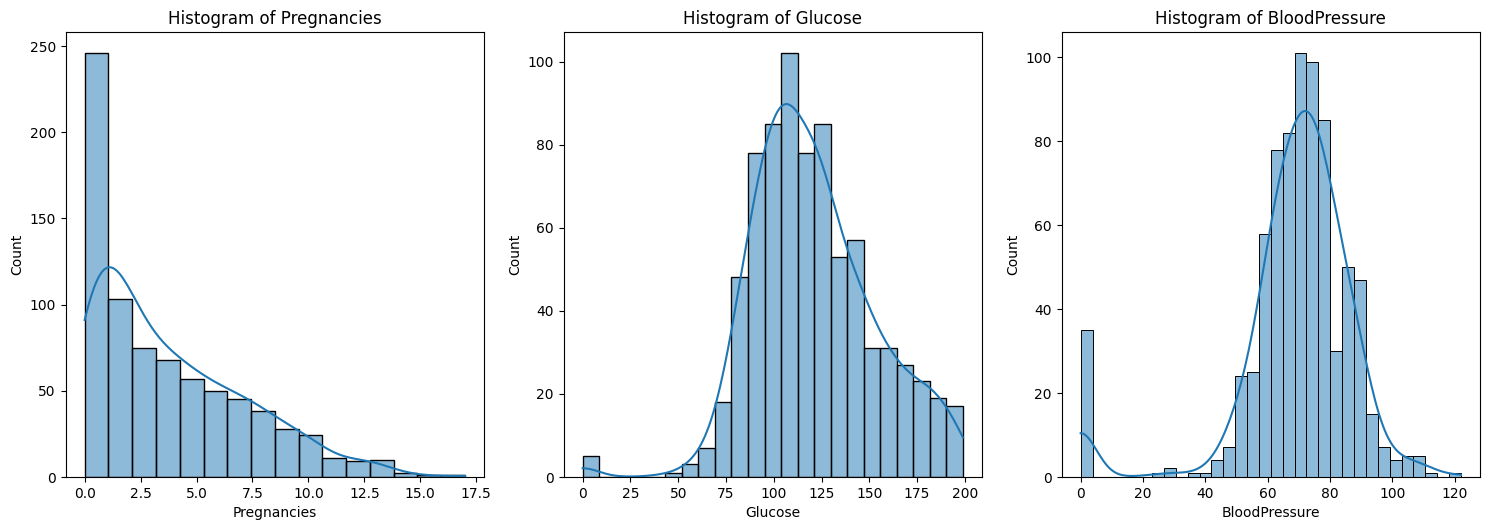

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("..//static//csv//diabetes.csv")

# Выбираем столбцы для анализа
columns_to_check = ['Pregnancies', 'Glucose', 'BloodPressure']

# Функция для подсчета выбросов
def count_outliers(df, columns):
    outliers_count = {}
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Считаем количество выбросов
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        outliers_count[col] = len(outliers)
    
    return outliers_count

# Подсчитываем выбросы
outliers_count = count_outliers(df, columns_to_check)

# Выводим количество выбросов для каждого столбца
for col, count in outliers_count.items():
    print(f"Количество выбросов в столбце '{col}': {count}")
    
# Создаем гистограммы
plt.figure(figsize=(15, 10))
for i, col in enumerate(columns_to_check, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[col], kde=True)
    plt.title(f'Histogram of {col}')
plt.tight_layout()
plt.show()

Можем заметить, что количество выбросов очень мало. Сделаем очистку от выбросов для столцба 'BloodPressure'

Количество удаленных строк: 45
Количество выбросов в столбце 'BloodPressure': 4


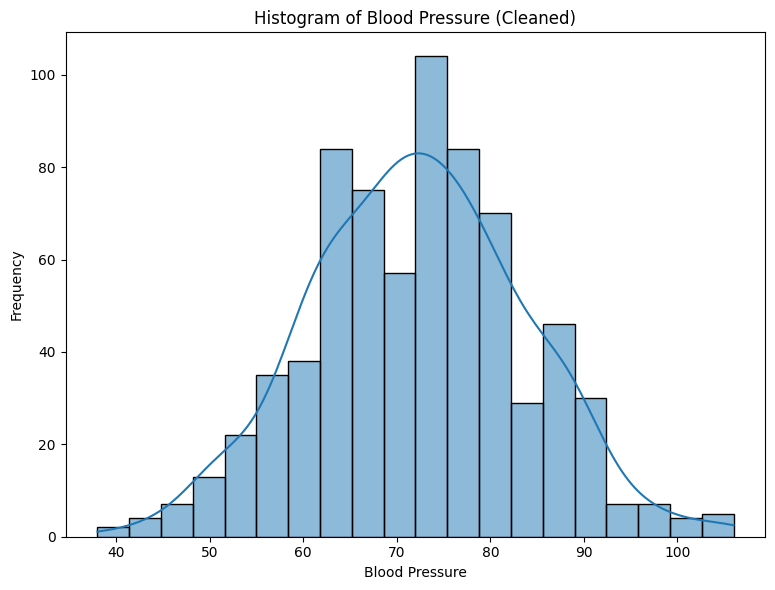

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
   
# Выбираем столбцы для очистки
columns_to_clean =  ['BloodPressure']

# Функция для удаления выбросов
def remove_outliers(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Удаляем строки, содержащие выбросы
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    
    return df

# Удаляем выбросы
df_cleaned = remove_outliers(df, columns_to_clean)

# Выводим количество удаленных строк
print(f"Количество удаленных строк: {len(df) - len(df_cleaned)}")

df = df_cleaned

# Функция для подсчета выбросов
def count_outliers(df, columns):
    outliers_count = {}
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Считаем количество выбросов
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        outliers_count[col] = len(outliers)
    
    return outliers_count

# Подсчитываем выбросы
outliers_count = count_outliers(df, columns_to_clean)

# Выводим количество выбросов для каждого столбца
for col, count in outliers_count.items():
    print(f"Количество выбросов в столбце '{col}': {count}")
 

# Создаем гистограммы для очищенных данных
plt.figure(figsize=(15, 6))

# Гистограмма для relative_velocity
plt.subplot(1, 2, 1)
sns.histplot(df_cleaned['BloodPressure'], kde=True)
plt.title('Histogram of Blood Pressure (Cleaned)')
plt.xlabel('Blood Pressure')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

Проверка на пропущенные значения

In [34]:
import pandas as pd

# Проверка на пропущенные значения
missing_values = df.isnull().sum()

# Вывод результатов
print("Количество пропущенных значений в каждом столбце:")
print(missing_values)

Количество пропущенных значений в каждом столбце:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


Пропущенных значений нет. Делаем разбиение на выборки

In [41]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Разделение на признаки (X) и целевую переменную (y)
X = df.drop('Outcome', axis=1)  # Признаки
y = df['Outcome']  # Целевая переменная

# Разбиение на обучающую и оставшуюся часть (контрольная + тестовая)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)

# Разбиение оставшейся части на контрольную и тестовую выборки
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Вывод размеров выборок
print("Размер обучающей выборки:", X_train.shape[0])
print("Размер контрольной выборки:", X_val.shape[0])
print("Размер тестовой выборки:", X_test.shape[0])

Размер обучающей выборки: 433
Размер контрольной выборки: 145
Размер тестовой выборки: 145


Разбивка на выборки сделана, проведем проверку на сбалансированность выборок

In [42]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Разделение на признаки (X) и целевую переменную (y)
X = df.drop('Outcome', axis=1)  # Признаки
y = df['Outcome']  # Целевая переменная

# Разбиение на обучающую и оставшуюся часть (контрольная + тестовая)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42, stratify=y)

# Разбиение оставшейся части на контрольную и тестовую выборки
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

# Функция для проверки сбалансированности выборок
def check_balance(y_train, y_val, y_test):
    print("Сбалансированность обучающей выборки:")
    print(y_train.value_counts(normalize=True))
    
    print("\nСбалансированность контрольной выборки:")
    print(y_val.value_counts(normalize=True))
    
    print("\nСбалансированность тестовой выборки:")
    print(y_test.value_counts(normalize=True))

# Проверка сбалансированности
check_balance(y_train, y_val, y_test)

Сбалансированность обучающей выборки:
Outcome
0    0.658199
1    0.341801
Name: proportion, dtype: float64

Сбалансированность контрольной выборки:
Outcome
0    0.655172
1    0.344828
Name: proportion, dtype: float64

Сбалансированность тестовой выборки:
Outcome
0    0.662069
1    0.337931
Name: proportion, dtype: float64


Выборки относительно сбалансированы, но не идеально. Сделаем приращение данных методом выборки с избытком (oversampling)

In [45]:
import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# Разделение на признаки (X) и целевую переменную (y)
X = df.drop('Outcome', axis=1)  # Признаки
y = df['Outcome']  # Целевая переменная

# Разбиение на обучающую и оставшуюся часть (контрольная + тестовая)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42, stratify=y)

# Разбиение оставшейся части на контрольную и тестовую выборки
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

# Применение SMOTE для балансировки обучающей выборки
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Функция для проверки сбалансированности выборок
def check_balance(y_train, y_val, y_test):
    print("Сбалансированность обучающей выборки:")
    print(y_train.value_counts(normalize=True))
    
    print("\nСбалансированность контрольной выборки:")
    print(y_val.value_counts(normalize=True))
    
    print("\nСбалансированность тестовой выборки:")
    print(y_test.value_counts(normalize=True))

# Проверка сбалансированности после SMOTE
print("Сбалансированность обучающей выборки после SMOTE:")
print(y_train_resampled.value_counts(normalize=True))

# Проверка сбалансированности контрольной и тестовой выборок
check_balance(y_train_resampled, y_val, y_test)

Сбалансированность обучающей выборки после SMOTE:
Outcome
0    0.5
1    0.5
Name: proportion, dtype: float64
Сбалансированность обучающей выборки:
Outcome
0    0.5
1    0.5
Name: proportion, dtype: float64

Сбалансированность контрольной выборки:
Outcome
0    0.655172
1    0.344828
Name: proportion, dtype: float64

Сбалансированность тестовой выборки:
Outcome
0    0.662069
1    0.337931
Name: proportion, dtype: float64


## Покемоны

Проблемная область: серия игр "Pokémon"

Объект наблюдения: покемоны - вымышленные существа, обладающие уникальными характеристиками и способностями

Атрибуты: изображение, индекс, имя, тип 1, тип 2, показатель силы, очки здоровья, атака, защита, специальная атака, специальная защита, скорость

Пример бизнес-цели: 

    1. Разработка рекомендательной системы для выбора покемона в игре. Цель технического проекта: Разработать алгоритм машинного обучения, который будет анализировать характеристики покемонов и предлагать игрокам наиболее подходящих покемонов для выбора в зависимости от их стиля игры, предпочтений и целей.

    2. Анализ сильных и слабых сторон покемонов для оптимизации баланса игры. Цель технического проекта: Провести статистический анализ данных о покемонах для выявления дисбаланса в игре, такого как слишком сильные или слабые типы покемонов, несбалансированные характеристики и т.д.

    3. Создание веб-приложения для поиска и сравнения покемонов. Цель технического проекта: Разработать веб-приложение, которое позволит пользователям искать покемонов по различным критериям (название, тип, характеристики) и сравнивать их между собой.

In [50]:
import pandas as pd 
df = pd.read_csv("..//static//csv//pokedex.csv")
print(df.columns)

Index(['Image', 'Index', 'Name', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack',
       'Defense', 'SP. Atk.', 'SP. Def', 'Speed'],
      dtype='object')


Проверка на выбросы

Количество выбросов в столбце 'HP': 27
Количество выбросов в столбце 'Attack': 13
Количество выбросов в столбце 'Defense': 25


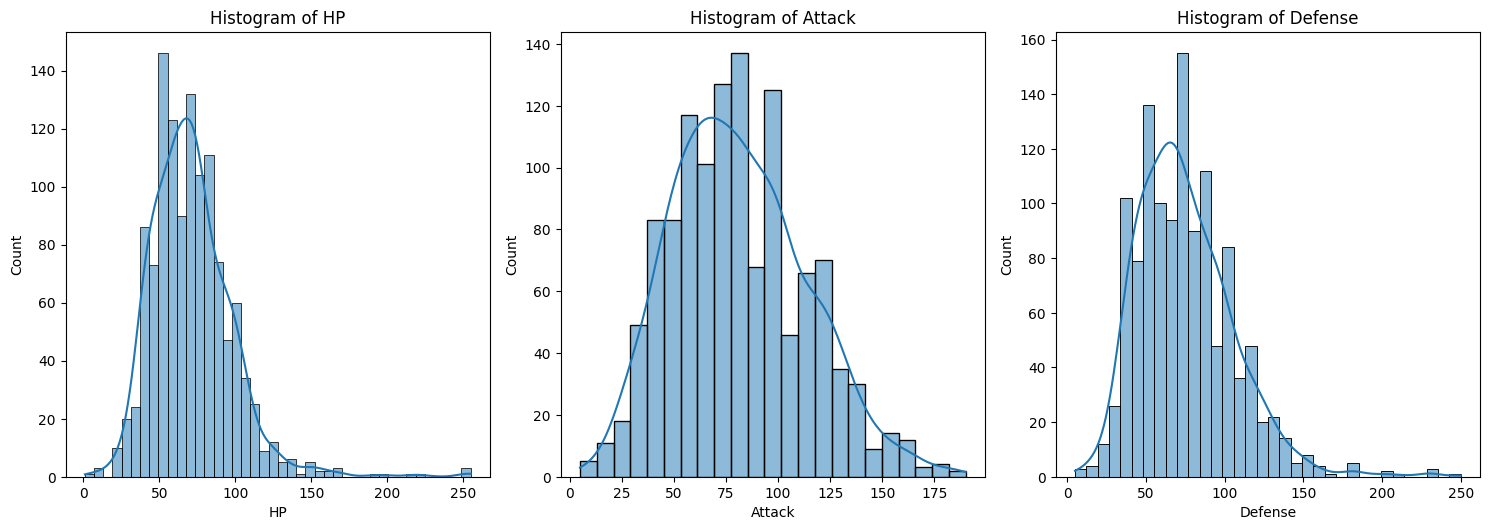

In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("..//static//csv//pokedex.csv")

# Выбираем числовые столбцы
numeric_columns = ['HP', 'Attack', 'Defense']

# Выбираем столбцы для анализа
columns_to_check = ['HP', 'Attack', 'Defense']

# Функция для подсчета выбросов
def count_outliers(df, columns):
    outliers_count = {}
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Считаем количество выбросов
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        outliers_count[col] = len(outliers)
    
    return outliers_count

# Подсчитываем выбросы
outliers_count = count_outliers(df, columns_to_check)

# Выводим количество выбросов для каждого столбца
for col, count in outliers_count.items():
    print(f"Количество выбросов в столбце '{col}': {count}")
    
# Создаем гистограммы
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[col], kde=True)
    plt.title(f'Histogram of {col}')
plt.tight_layout()
plt.show()

Во всех проверенных столбцах присутствуют выбросы. Удалим их.

Количество удаленных строк: 0
Количество выбросов в столбце 'HP': 0
Количество выбросов в столбце 'Attack': 0
Количество выбросов в столбце 'Defense': 0


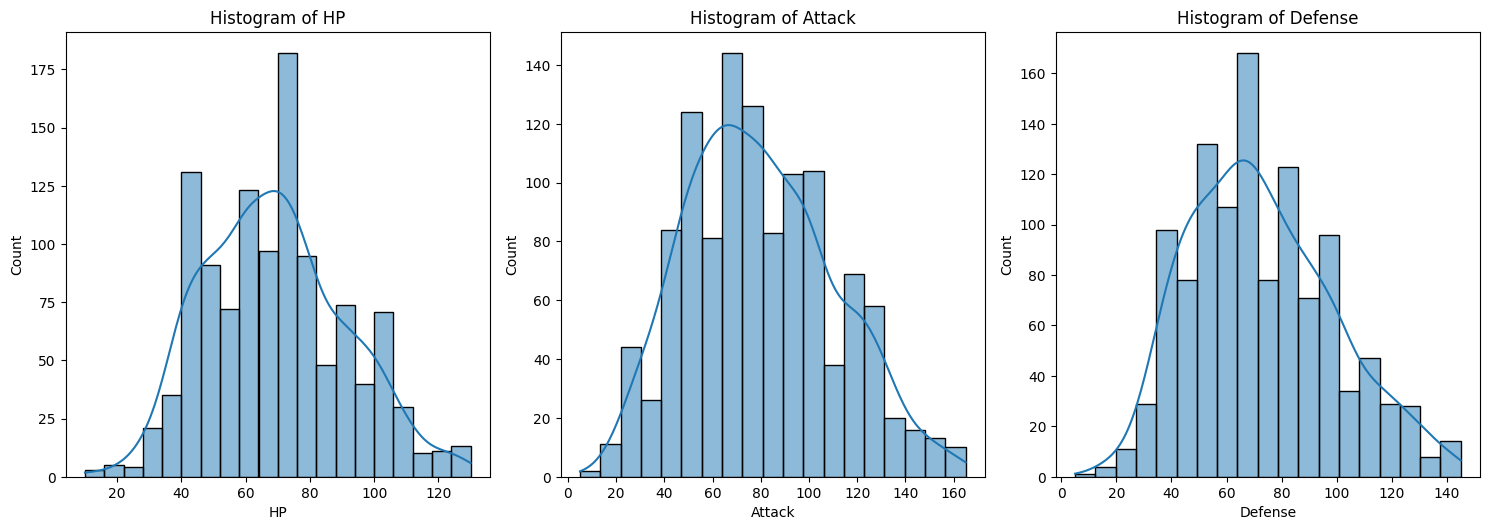

In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
   
# Выбираем столбцы для очистки
columns_to_clean =  ['HP', 'Attack', 'Defense']

# Функция для удаления выбросов
def remove_outliers(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Удаляем строки, содержащие выбросы
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    
    return df

# Удаляем выбросы
df_cleaned = remove_outliers(df, columns_to_clean)

# Выводим количество удаленных строк
print(f"Количество удаленных строк: {len(df) - len(df_cleaned)}")

df = df_cleaned

# Выбираем столбцы для анализа
columns_to_check = ['HP', 'Attack', 'Defense']

# Функция для подсчета выбросов
def count_outliers(df, columns):
    outliers_count = {}
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Считаем количество выбросов
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        outliers_count[col] = len(outliers)
    
    return outliers_count

# Подсчитываем выбросы
outliers_count = count_outliers(df, columns_to_check)

# Выводим количество выбросов для каждого столбца
for col, count in outliers_count.items():
    print(f"Количество выбросов в столбце '{col}': {count}")
 

# Создаем гистограммы
plt.figure(figsize=(15, 10))
for i, col in enumerate(columns_to_clean, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[col], kde=True)
    plt.title(f'Histogram of {col}')
plt.tight_layout()
plt.show()

Проверка на пропущенные значения

In [55]:
import pandas as pd

# Проверка на пропущенные значения
missing_values = df.isnull().sum()

# Вывод результатов
print("Количество пропущенных значений в каждом столбце:")
print(missing_values)

Количество пропущенных значений в каждом столбце:
Image         0
Index         0
Name          0
Type 1        0
Type 2      526
Total         0
HP            0
Attack        0
Defense       0
SP. Atk.      0
SP. Def       0
Speed         0
dtype: int64


В датасете присутствуют пропущенные значения. Удалим их.

In [57]:
# Удаление пропущенных значений в столбце 'Type 2'
df = df.dropna(subset=['Type 2'])

# Проверка на пропущенные значения после удаления
missing_values_after_drop = df.isnull().sum()

# Вывод результатов после удаления
print("\nКоличество пропущенных значений в каждом столбце после удаления:")
print(missing_values_after_drop)


Количество пропущенных значений в каждом столбце после удаления:
Image       0
Index       0
Name        0
Type 1      0
Type 2      0
Total       0
HP          0
Attack      0
Defense     0
SP. Atk.    0
SP. Def     0
Speed       0
dtype: int64


Пропущенные значения удалены. Сделаем разбиение для выборки

In [58]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Разделение на признаки (X) и целевую переменную (y)
X = df.drop(columns=['Total'])
y = df['Total']

# Разбиение на обучающую и остальную выборку (60% обучающая, 40% остальная)
X_train, X_rem, y_train, y_rem = train_test_split(X, y, train_size=0.6, random_state=42)

# Разбиение остальной выборки на контрольную и тестовую (50% контрольная, 50% тестовая)
X_valid, X_test, y_valid, y_test = train_test_split(X_rem, y_rem, test_size=0.5, random_state=42)

# Вывод размеров выборок
print("Размер обучающей выборки:", X_train.shape, y_train.shape)
print("Размер контрольной выборки:", X_valid.shape, y_valid.shape)
print("Размер тестовой выборки:", X_test.shape, y_test.shape)

Размер обучающей выборки: (378, 11) (378,)
Размер контрольной выборки: (126, 11) (126,)
Размер тестовой выборки: (126, 11) (126,)


In [60]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Разделение на признаки (X) и целевую переменную (y)
X = df.drop(columns=['Total'])
y = df['Total']

# Разбиение на обучающую и остальную выборку (60% обучающая, 40% остальная)
X_train, X_rem, y_train, y_rem = train_test_split(X, y, train_size=0.6, random_state=42)

# Разбиение остальной выборки на контрольную и тестовую (50% контрольная, 50% тестовая)
X_valid, X_test, y_valid, y_test = train_test_split(X_rem, y_rem, test_size=0.5, random_state=42)

# Функция для анализа сбалансированности выборки
def analyze_balance(y_train, y_valid, y_test):
    print("Анализ сбалансированности выборки:")
    
    # Описание для обучающей выборки
    print("\nОбучающая выборка:")
    print(y_train.describe())
    
    # Описание для контрольной выборки
    print("\nКонтрольная выборка:")
    print(y_valid.describe())
    
    # Описание для тестовой выборки
    print("\nТестовая выборка:")
    print(y_test.describe())

# Анализ сбалансированности выборки
analyze_balance(y_train, y_valid, y_test)

Анализ сбалансированности выборки:

Обучающая выборка:
count    378.000000
mean     462.941799
std      116.093563
min      185.000000
25%      377.750000
50%      485.000000
75%      535.000000
max      700.000000
Name: Total, dtype: float64

Контрольная выборка:
count    126.000000
mean     455.753968
std      102.380599
min      198.000000
25%      402.000000
50%      478.000000
75%      520.000000
max      700.000000
Name: Total, dtype: float64

Тестовая выборка:
count    126.000000
mean     462.547619
std      110.064680
min      205.000000
25%      362.500000
50%      485.000000
75%      530.000000
max      680.000000
Name: Total, dtype: float64


Выборка сбалансирована